# Macroscopic Smell Test
In this notebook, we look at how different types of fitting parameters change within a small time window in our TFO PPG probe data. The goal is to determine if there is any pattern that can be used to track $\mu_a$. The patterns should also agree with whatever we observe from simulation.  

Essentially, I want to know if the fitting scheme I am using currently is actually good.


In [1]:
from itertools import product
from typing import List, Union
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from TFO_dataset import SheepData
from inverse_modelling_tfo.data.intensity_interpolation import get_interpolate_fit_params, get_interpolate_fit_params_custom
from inverse_modelling_tfo.data.interpolation_function_zoo import unity_at_zero_interpolation
from inverse_modelling_tfo.data.tfo_data_helpers import transform_tfo_data

In [2]:
# Load Data
tag = {'experiment_number': 5, 'experiment_round': 1, 'experiment_year_prefix': 'sp2022',
       'additional_info': '', 'data_version': 'iq_demod_optical'}
START_TIME_SECONDS = 50
END_TIME_SECONDS = 70
WEIGHTS = [0, 1]
data = SheepData('iq_demod_optical').get_data_from_tag(tag)
data = data.iloc[START_TIME_SECONDS * 80 : END_TIME_SECONDS * 80, :]
print(f'Sample Length : {len(data)}')

Sample Length : 1600


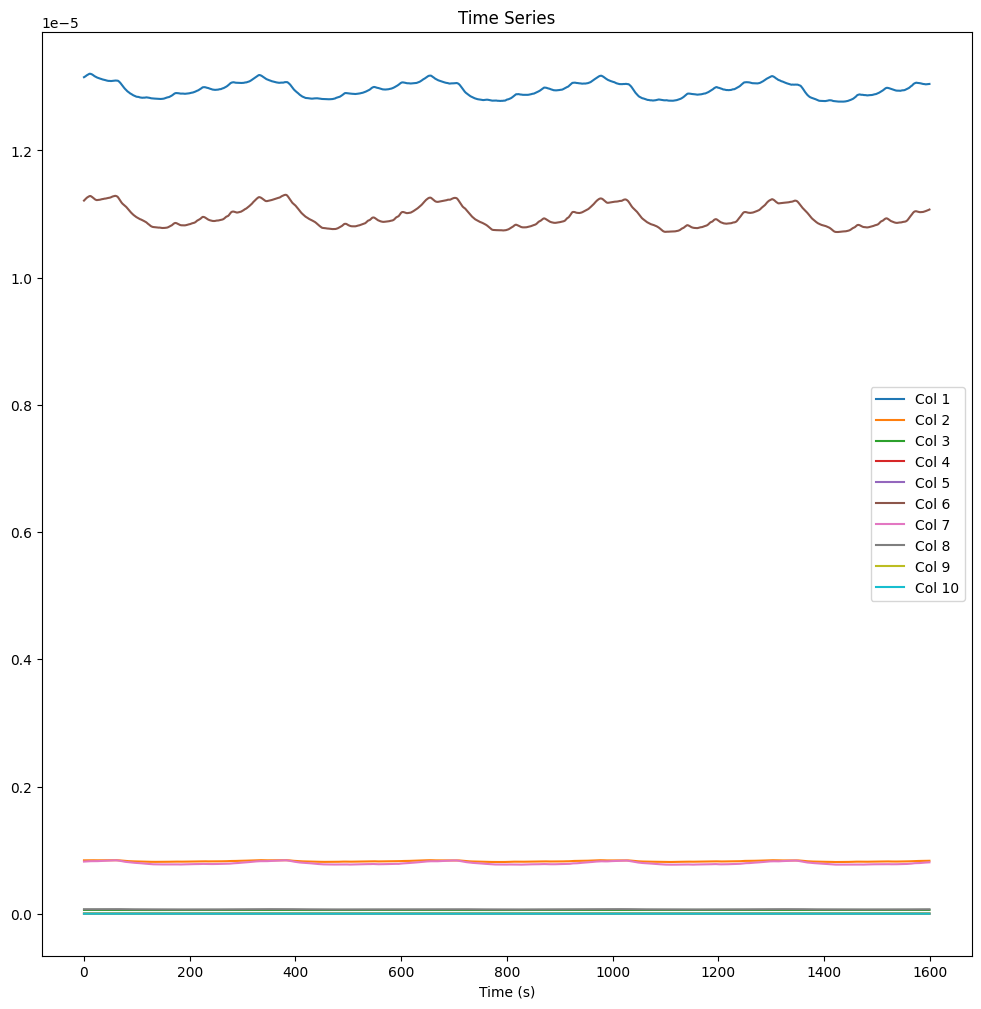

In [3]:
plt.figure(figsize=(12, 12))
plt.title("Time Series")
for col in range(data.to_numpy().shape[1]):
    plt.plot(data.to_numpy()[:, col], label=f'Col {col + 1}')
time_axis = np.arange(0, data.to_numpy().shape[0]/80, 1/80)
plt.xlabel('Time (s)')
plt.legend()
plt.show()

In [4]:
sdd = SheepData('iq_demod_optical').get_sdd_distance(tag)
data = transform_tfo_data(data, sdd)
data.head()

,SDD,Intensity,Wave Int
0,15.0,1.315188e-05,1.0
1,30.0,8.400222e-07,1.0
2,45.0,6.043765e-08,1.0
3,70.0,3.003695e-09,1.0
4,100.0,8.940513e-10,1.0


In [5]:
fit_params = get_interpolate_fit_params_custom(
    data, unity_at_zero_interpolation, sdd_chunk_size=len(sdd), weights=WEIGHTS, return_alpha=True)
fit_params.head()

,Wave Int,alpha0,alpha1,alpha2
0,1.0,7.120486,-19.855942,3.657637
1,1.0,7.121551,-19.857228,3.658381
2,1.0,7.124085,-19.862896,3.661942
3,1.0,7.125834,-19.867458,3.665115
4,1.0,7.126261,-19.869238,3.666767


In [6]:
%matplotlib widget

Text(0, 0.5, 'Fitting Parameter')

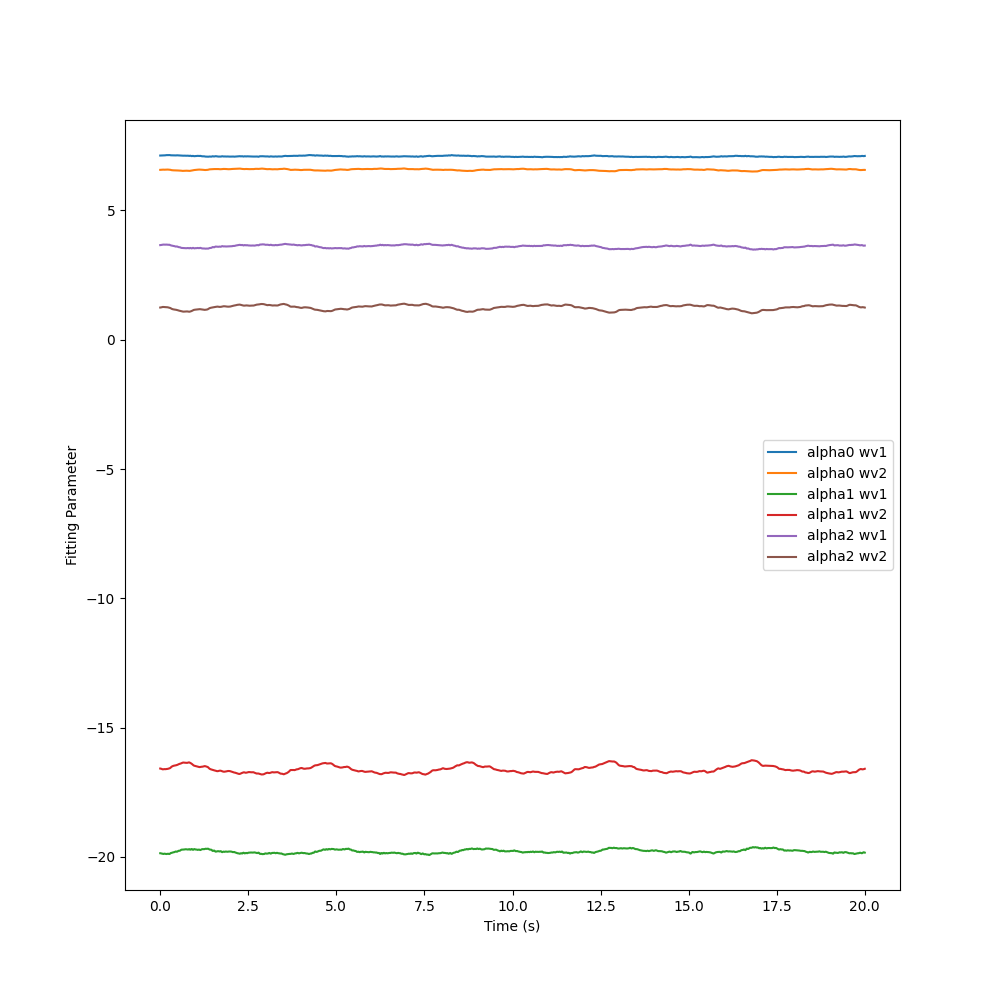

In [7]:
# Plot fitting params.
plt.figure(figsize=(10, 10))
wv1_params = fit_params[fit_params["Wave Int"] == 1.0]
wv2_params = fit_params[fit_params["Wave Int"] == 2.0]
time_axis = np.linspace(0, len(wv1_params)/80, len(wv1_params))

columns_to_plot = list(filter(lambda X: 'alpha' in X, fit_params.columns))
for column in columns_to_plot:
    plt.plot(time_axis, wv1_params[column], label=f'{column} wv1')
    plt.plot(time_axis, wv2_params[column], label=f'{column} wv2')
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Fitting Parameter")

In [8]:
print(len(time_axis))
print(len(wv1_params[column]))

1600
1600
